I risultati, i modelli e i grafici verranno salvati in: 'lstm_results_20250912_100457'
Applico l'ingegneria delle feature...
Il numero di feature è passato da 16 a 48
Dati caricati con 324 campioni e 48 feature.
Scaler salvato in: lstm_results_20250912_100457/scaler.gz

--- FOLD 1/5 ---


/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training su 216 campioni, validazione su 24 campioni...
Modello e history del Fold 1 salvati in 'lstm_results_20250912_100457/fold_1'
Previsione autoregressiva di 12 step futuri...
✅ MSE Fold 1 (reale): 866906545.0385
   RMSE Fold 1 (reale): 29443.2767
   MAE Fold 1 (reale): 22953.4730

--- FOLD 2/5 ---


/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training su 226 campioni, validazione su 26 campioni...
Modello e history del Fold 2 salvati in 'lstm_results_20250912_100457/fold_2'
Previsione autoregressiva di 12 step futuri...
✅ MSE Fold 2 (reale): 168991089.8829
   RMSE Fold 2 (reale): 12999.6573
   MAE Fold 2 (reale): 10944.8614

--- FOLD 3/5 ---


/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training su 237 campioni, validazione su 27 campioni...
Modello e history del Fold 3 salvati in 'lstm_results_20250912_100457/fold_3'
Previsione autoregressiva di 12 step futuri...
✅ MSE Fold 3 (reale): 385231966.0287
   RMSE Fold 3 (reale): 19627.3270
   MAE Fold 3 (reale): 15438.8367

--- FOLD 4/5 ---


/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training su 248 campioni, validazione su 28 campioni...
Modello e history del Fold 4 salvati in 'lstm_results_20250912_100457/fold_4'
Previsione autoregressiva di 12 step futuri...
✅ MSE Fold 4 (reale): 478116230.9337
   RMSE Fold 4 (reale): 21865.8691
   MAE Fold 4 (reale): 18021.9710

--- FOLD 5/5 ---


/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training su 259 campioni, validazione su 29 campioni...
Modello e history del Fold 5 salvati in 'lstm_results_20250912_100457/fold_5'
Previsione autoregressiva di 12 step futuri...
✅ MSE Fold 5 (reale): 506669910.5558
   RMSE Fold 5 (reale): 22509.3294
   MAE Fold 5 (reale): 15670.7077


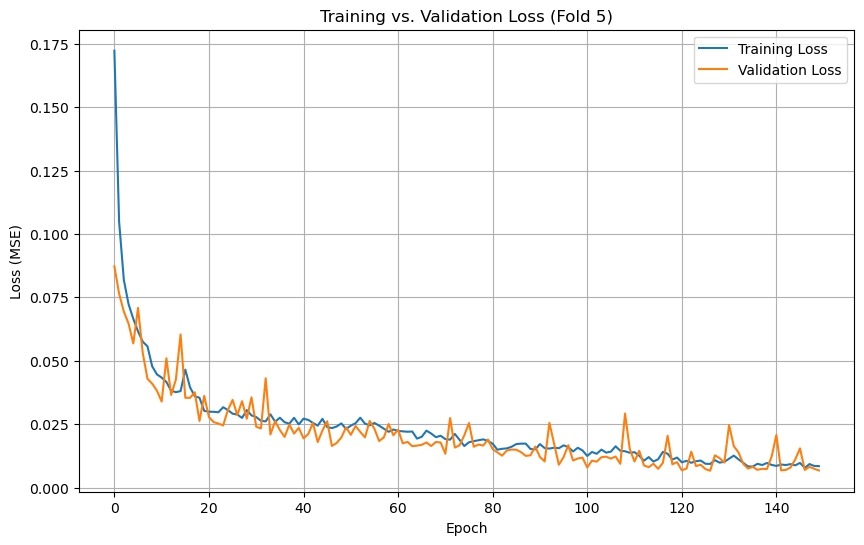


--- Risultati Finali della Cross-Validation (sui dati reali) ---
   MSE Medio: 481183148.4879
   RMSE Medio: 21935.8872  (Errore medio in unità originali)
   MAE Medio: 16605.9700    (Errore assoluto medio in unità originali)

Visualizzazione e salvataggio dei risultati di tutti i fold...


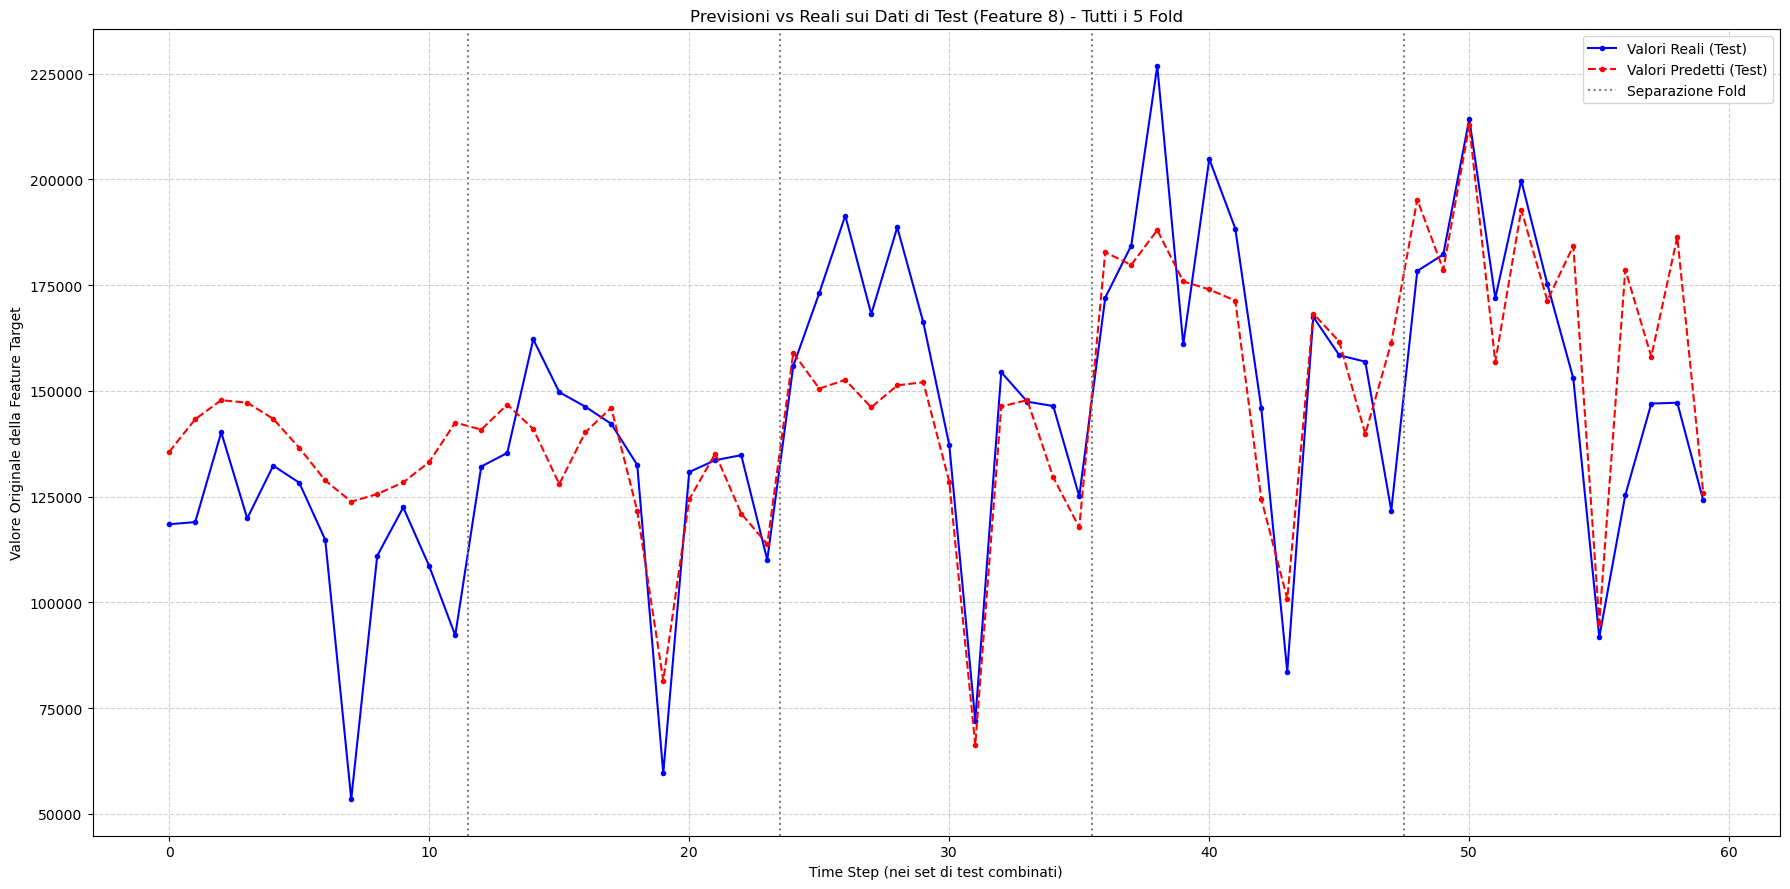


--- Analisi e Salvataggio degli Errori ---


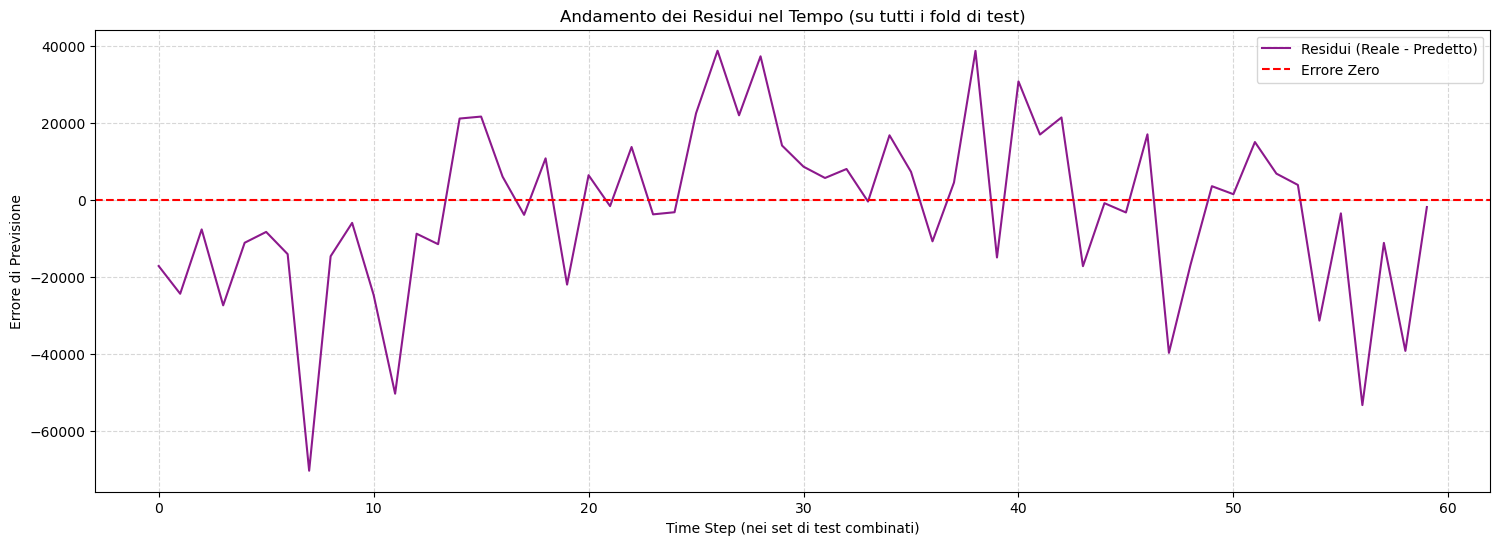

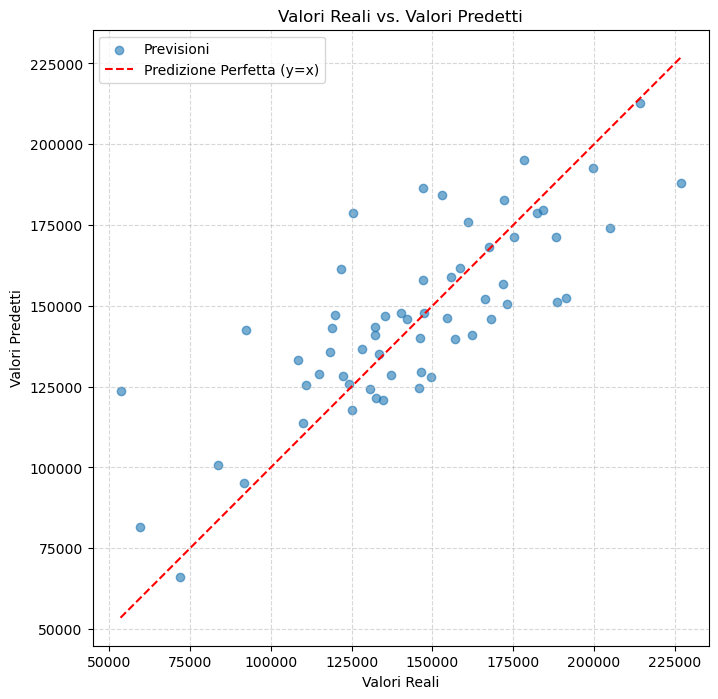

   Errore relativo medio: 13.57%

✅ Esecuzione completata. Tutti i risultati sono stati salvati in 'lstm_results_20250912_100457'.


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import os
from datetime import datetime
import joblib

# --- Gestione Cartelle e File ---
# Crea una cartella principale per questo run, basata sul timestamp corrente
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
RESULTS_DIR = f"lstm_results_{timestamp}"
os.makedirs(RESULTS_DIR, exist_ok=True)
print(f"I risultati, i modelli e i grafici verranno salvati in: '{RESULTS_DIR}'")

# Centralizzazione degli Iperparametri
SEQ_LENGTH = 24
TARGET_COL_INDEX = 8
N_SPLITS = 5
EPOCHS = 150
BATCH_SIZE = 16
LEARNING_RATE = 0.00594
HORIZON = 12  # Orizzonte di previsione per ogni fold

# 1. Carica e Prepara i Dati Multivariati
try:
    data = pd.read_csv("testDati.csv", header=None)
except FileNotFoundError:
    print("ERRORE: File 'testDati.csv' non trovato. Assicurati che sia nella stessa cartella dello script.")
    exit()

# Applico l'ingegneria delle feature
print("Applico l'ingegneria delle feature...")
original_data = data.copy()
n_original_features = data.shape[1]
window_size = 5
max_value = 24

for i in range(n_original_features):
    data[f'feature_{i}_mean'] = original_data[i].rolling(window=window_size).mean()
    data[f'feature_{i}_lag_1'] = original_data[i].shift(1)

data = data.dropna().reset_index(drop=True)
shift_start = (max_value - window_size) + 1
data = data.iloc[shift_start:]

print(f"Il numero di feature è passato da {n_original_features} a {data.shape[1]}")
values = data.values.astype('float32')
n_features = values.shape[1]
print(f"Dati caricati con {values.shape[0]} campioni e {n_features} feature.")

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(values)

# Salva lo scaler per poterlo riutilizzare
scaler_path = os.path.join(RESULTS_DIR, 'scaler.gz')
joblib.dump(scaler, scaler_path)
print(f"Scaler salvato in: {scaler_path}")


def create_multivariate_sequences(data, seq_length, target_col_index=0):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])
        y.append(data[i + seq_length, target_col_index])
    return np.array(X), np.array(y)

# 2. Funzione per Creare il Modello
def create_lstm_model(sequence_length, num_features, learning_rate):
    model = Sequential([
        LSTM(32, return_sequences=True, kernel_regularizer=l2(0.00082),
             input_shape=(sequence_length, num_features)),
        Dropout(0.4),
        LSTM(48, return_sequences=False, kernel_regularizer=l2(8.984e-05)),
        Dropout(0.2),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# 3. Esecuzione Rolling Cross-Validation
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=15, min_lr=1e-5)

tscv = TimeSeriesSplit(n_splits=N_SPLITS, test_size=HORIZON)

all_y_test_rescaled = []
all_y_pred_rescaled = []
mse_scores_rescaled = []
mae_scores_rescaled = []
fold_counter = 0

for train_index, test_index in tscv.split(scaled_values):
    fold_counter += 1
    print(f"\n--- FOLD {fold_counter}/{N_SPLITS} ---")

    # Crea una sottocartella per il fold corrente
    fold_dir = os.path.join(RESULTS_DIR, f"fold_{fold_counter}")
    os.makedirs(fold_dir, exist_ok=True)

    train_data = scaled_values[train_index]
    test_data = scaled_values[test_index]

    X_train, y_train = create_multivariate_sequences(train_data, SEQ_LENGTH, TARGET_COL_INDEX)

    if len(X_train) == 0:
        print(f"Fold {fold_counter} saltato: dati di training insufficienti.")
        continue

    val_split_point = int(len(X_train) * 0.9)
    X_train_fold, X_val_fold = X_train[:val_split_point], X_train[val_split_point:]
    y_train_fold, y_val_fold = y_train[:val_split_point], y_train[val_split_point:]

    tf.keras.backend.clear_session()
    model = create_lstm_model(SEQ_LENGTH, n_features, LEARNING_RATE)

    print(f"Training su {len(X_train_fold)} campioni, validazione su {len(X_val_fold)} campioni...")
    history = model.fit(X_train_fold, y_train_fold, epochs=EPOCHS, batch_size=BATCH_SIZE,
                        validation_data=(X_val_fold, y_val_fold),
                        callbacks=[early_stopping, reduce_lr], verbose=0)

    # Salva il modello e la history del training
    model.save(os.path.join(fold_dir, 'lstm_model.keras'))
    pd.DataFrame(history.history).to_csv(os.path.join(fold_dir, 'training_history.csv'), index=False)
    print(f"Modello e history del Fold {fold_counter} salvati in '{fold_dir}'")

    # Sezione di previsione autoregressiva
    print(f"Previsione autoregressiva di {HORIZON} step futuri...")
    predictions_fold_scaled = []
    current_context_np = train_data[-SEQ_LENGTH:]

    for i in range(HORIZON):
        context_tensor = np.expand_dims(current_context_np, axis=0)
        next_pred_val_scaled = model.predict(context_tensor, verbose=0)[0, 0]
        predictions_fold_scaled.append(next_pred_val_scaled)
        
        next_step_features = test_data[i, :].copy()
        next_step_features[TARGET_COL_INDEX] = next_pred_val_scaled
        current_context_np = np.vstack([current_context_np[1:], next_step_features])

    # Inversione della normalizzazione
    y_test_fold_scaled = test_data[:, TARGET_COL_INDEX]
    y_pred_rescaled_full = np.zeros((len(predictions_fold_scaled), n_features))
    y_test_rescaled_full = np.zeros((len(y_test_fold_scaled), n_features))
    y_pred_rescaled_full[:, TARGET_COL_INDEX] = np.array(predictions_fold_scaled)
    y_test_rescaled_full[:, TARGET_COL_INDEX] = y_test_fold_scaled
    y_pred_rescaled = scaler.inverse_transform(y_pred_rescaled_full)[:, TARGET_COL_INDEX]
    y_test_rescaled = scaler.inverse_transform(y_test_rescaled_full)[:, TARGET_COL_INDEX]

    # Salva le predizioni del fold
    pd.DataFrame({
        'y_test_rescaled': y_test_rescaled,
        'y_pred_rescaled': y_pred_rescaled
    }).to_csv(os.path.join(fold_dir, 'predictions.csv'), index=False)

    all_y_test_rescaled.append(y_test_rescaled)
    all_y_pred_rescaled.append(y_pred_rescaled)
    
    mse_fold_rescaled = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    mae_fold_rescaled = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
    mse_scores_rescaled.append(mse_fold_rescaled)
    mae_scores_rescaled.append(mae_fold_rescaled)

    print(f"✅ MSE Fold {fold_counter} (reale): {mse_fold_rescaled:.4f}")
    print(f"   RMSE Fold {fold_counter} (reale): {np.sqrt(mse_fold_rescaled):.4f}")
    print(f"   MAE Fold {fold_counter} (reale): {mae_fold_rescaled:.4f}")

    if fold_counter == N_SPLITS:
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training vs. Validation Loss (Fold {fold_counter})')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.legend()
        plt.grid(True)
        # Salva il grafico
        plt.savefig(os.path.join(fold_dir, 'loss_plot.png'))
        plt.show()

# 4. Analizza e Salva i Risultati Complessivi
print("\n--- Risultati Finali della Cross-Validation (sui dati reali) ---")
mean_mse = np.mean(mse_scores_rescaled)
mean_rmse = np.sqrt(mean_mse)
mean_mae = np.mean(mae_scores_rescaled)

print(f"   MSE Medio: {mean_mse:.4f}")
print(f"   RMSE Medio: {mean_rmse:.4f}  (Errore medio in unità originali)")
print(f"   MAE Medio: {mean_mae:.4f}    (Errore assoluto medio in unità originali)")

# Salva un riepilogo delle metriche
with open(os.path.join(RESULTS_DIR, 'summary_metrics.txt'), 'w') as f:
    f.write("--- Risultati Finali della Cross-Validation ---\n")
    f.write(f"MSE Medio: {mean_mse:.4f}\n")
    f.write(f"RMSE Medio: {mean_rmse:.4f}\n")
    f.write(f"MAE Medio: {mean_mae:.4f}\n")

# 5. Visualizza e Salva i Risultati Complessivi
print("\nVisualizzazione e salvataggio dei risultati di tutti i fold...")
plt.figure(figsize=(18, 9))

y_true_combined = np.concatenate(all_y_test_rescaled)
y_pred_combined = np.concatenate(all_y_pred_rescaled)
prediction_indices = np.arange(len(y_true_combined))

plt.plot(prediction_indices, y_true_combined, label='Valori Reali (Test)', color='blue', marker='o', linestyle='-', markersize=3)
plt.plot(prediction_indices, y_pred_combined, label='Valori Predetti (Test)', color='red', marker='o', linestyle='--', markersize=3)

for i in range(N_SPLITS - 1):
    vline_pos = (i + 1) * HORIZON - 0.5
    plt.axvline(x=vline_pos, color='gray', linestyle=':', label=f'Separazione Fold' if i == 0 else "")

plt.title(f"Previsioni vs Reali sui Dati di Test (Feature {TARGET_COL_INDEX}) - Tutti i {N_SPLITS} Fold")
plt.xlabel("Time Step (nei set di test combinati)")
plt.ylabel("Valore Originale della Feature Target")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
# Salva il grafico
plt.savefig(os.path.join(RESULTS_DIR, 'combined_predictions_plot.png'))
plt.show()

# 6. Analisi degli Errori
print("\n--- Analisi e Salvataggio degli Errori ---")
if len(y_true_combined) > 0 and len(y_pred_combined) > 0:
    residuals = y_true_combined - y_pred_combined

    # Grafico 1: Residui nel tempo
    plt.figure(figsize=(18, 6))
    plt.plot(residuals, label='Residui (Reale - Predetto)', color='purple', alpha=0.9)
    plt.axhline(0, color='red', linestyle='--', label='Errore Zero')
    plt.title('Andamento dei Residui nel Tempo (su tutti i fold di test)')
    plt.xlabel('Time Step (nei set di test combinati)')
    plt.ylabel('Errore di Previsione')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    # Salva il grafico
    plt.savefig(os.path.join(RESULTS_DIR, 'residuals_plot.png'))
    plt.show()

    # Grafico 2: Scatter plot Reali vs. Predetti
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true_combined, y_pred_combined, alpha=0.6, label='Previsioni')
    perfect_line = np.linspace(min(y_true_combined), max(y_true_combined), 100)
    plt.plot(perfect_line, perfect_line, color='red', linestyle='--', label='Predizione Perfetta (y=x)')
    plt.title('Valori Reali vs. Valori Predetti')
    plt.xlabel('Valori Reali')
    plt.ylabel('Valori Predetti')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.axis('equal')
    plt.gca().set_aspect('equal', adjustable='box')
    # NUOVO: Salva il grafico
    plt.savefig(os.path.join(RESULTS_DIR, 'scatter_plot_real_vs_pred.png'))
    plt.show()

    epsilon = 1e-9
    y_true_safe = np.where(y_true_combined == 0, epsilon, y_true_combined)
    relative_errors = np.abs(residuals) / y_true_safe
    mean_relative_error = np.mean(relative_errors) * 100
    print(f"   Errore relativo medio: {mean_relative_error:.2f}%")
    # NUOVO: Aggiungi al file di riepilogo
    with open(os.path.join(RESULTS_DIR, 'summary_metrics.txt'), 'a') as f:
        f.write(f"Errore relativo medio: {mean_relative_error:.2f}%\n")
else:
    print("Nessun risultato di test da analizzare.")

print(f"\n✅ Esecuzione completata. Tutti i risultati sono stati salvati in '{RESULTS_DIR}'.")
